# Import Modules

In [5]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("default")

# Define Constants and Functions

In [2]:
# Physical constants
hbar = 6.63*10**(-34) / ( 2*np.pi )     # Reduced Planck's constant [Js]
m_el = 3.109*10**(-31)                  # Electron mass [kg]
m_proton = 1.67 * 10**(-27)             # Proton mass [kg]
m_neutron = 1.67 * 10**(-27)            # Neutron mass [kg]
m_helium = 2*m_proton + 2*m_neutron     # Helium atom mass [kg]

In [1]:
# Function which returns the "Amplitude function" A(k) for superposition in the Gaussian wave packet
# Add a factor of square root of 2*pi to make us able to seamlessly aply Fourier transform
def A(k, k0, sigma):
    C = np.sqrt(sigma) / (np.pi**(0.25) * np.sqrt( 2*np.pi ))

    return np.exp( -0.5* sigma**2 *( k - k0  )**2 ) * C * np.sqrt(2*np.pi)

# Function which returns the wavefunction of the Gaussian wave packet
def psi(x, t, k0, m, sigma):
        
    v =  k0 * hbar / m   
    omega0 = hbar*k0**2 / ( 2*m ) 
    
    C = np.sqrt(sigma) / ( np.pi**(0.25) * np.sqrt( sigma**2 + 1j*hbar*t / m ) )
    phase =  np.exp( 1j*( k0*x - omega0*t ))
    
    return C * phase * np.e**( -0.5*(x - v * t)**2 / ( sigma**2 + 1j*hbar*t / m ) ) 

# Plot Gaussian

In [57]:
# Function which plots the A(k), psi(x), |A(k)|^2 and |psi(x)|^2
# This is just cosmetic
def plot_wavepacket(x, k, k0, sigma, m, t):
    fig, ax = plt.subplots(2, 2, figsize=(12,8), sharey=False)
    fig.suptitle("Gaussian Wavepacket and Amplitude Function", fontsize=20)
    ax = ax.flatten()
    ax[0].plot(k, A(k, k0, sigma), c="tab:blue", label=r"$A(k)$")
    ax[0].fill(k, A(k, k0, sigma), c="cornflowerblue", alpha=0.3)
    ax[0].set_xlabel("k", fontsize=18)
    ax[0].legend(fontsize=14)
    ax[1].plot(x, psi(x, t=t, k0=k0, m=m, sigma=sigma).real, 
               lw=1, color="tab:red", label=r"$Re\{\Psi(x,t)\}$")
    ax[1].fill(x, psi(x, t=t, k0=k0, m=m, sigma=sigma).real, c="indianred", alpha=0.3)
    ax[1].plot(x, psi(x, t=t, k0=k0, m=m, sigma=sigma).imag, 
               lw=1, color="tab:green", label=r"$Im\{\Psi(x,t)\}$")
    ax[1].fill(x, psi(x, t=t, k0=k0, m=m, sigma=sigma).imag, c="forestgreen", alpha=0.3)
    ax[1].plot(x, np.abs(psi(x, t=t, k0=k0, m=m, sigma=sigma)), 
               ls="--", c="gray", alpha=0.5, label=r"$|\Psi(x,t)|$")
    ax[1].set_xlabel("x", fontsize=18)
    ax[1].legend(fontsize=12)

    ax[2].plot(k, np.abs(A(k, k0, sigma))**2, c="tab:blue", label=r"$|A(k)|^2$")
    ax[2].fill(k, np.abs(A(k, k0, sigma))**2, c="cornflowerblue", alpha=0.3)
    ax[2].set_xlabel("k", fontsize=18)
    ax[2].legend(fontsize=14)
    ax[3].plot(x, np.abs(psi(x, t=t, k0=k0, m=m, sigma=sigma))**2, 
               color="tab:red", label=r"$|\Psi(x,t)|^2$")
    ax[3].fill(x, np.abs(psi(x, t=t, k0=k0, m=m, sigma=sigma))**2, 
               c="indianred", alpha=0.3)
    ax[3].set_xlabel("x", fontsize=18)
    ax[3].legend(fontsize=14)
    plt.show()

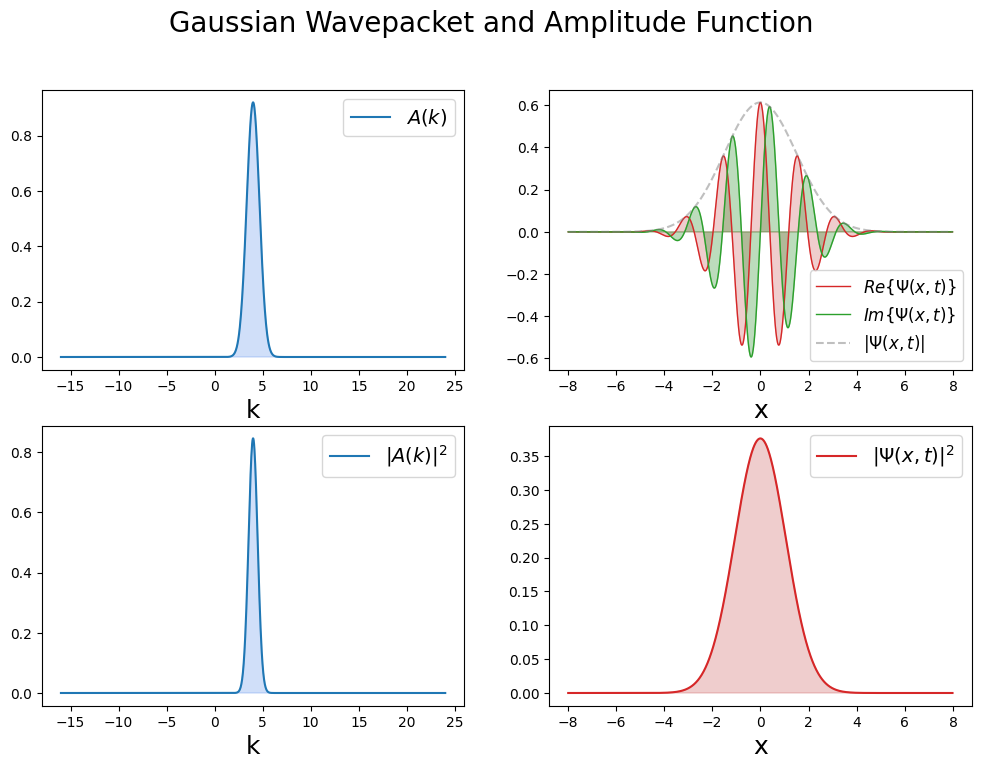

In [56]:
k0 = 4
sigma = 1.5
t = 0

k = np.linspace(-20 + k0, 20 + k0, 1000)
x = np.linspace(-20, 20, 1000) / np.sqrt(2*np.pi)


plot_wavepacket(x, k, k0=k0, sigma=sigma, m=m_el, t=t)

# Fourier Transform of Gaussian

In [53]:
# Function which plots the wavepacket and amplitude function and the fourier transforms
def plot_fourier_Gaussian(k0=k0, sigma=sigma, m=m_el, t=t):
    
    # find the fourier transforms
    n = 100000
    x = np.linspace(-500, 500, n)
    dx = x[1] - x[0]

    dk = 2.0 * np.pi / (x[-1] - x[0])
    k = np.arange(-n/2 , n/2)*dk

    psi_ = psi(x, t=t, k0=k0, m=m, sigma=sigma)
    trans_psi = np.fft.fftshift(np.fft.fft(psi_, norm=None)) * dx  / np.sqrt(2*np.pi) 
    inv_trans_psi = np.fft.ifft(np.fft.ifftshift(trans_psi), norm=None) * dk * n / np.sqrt(2*np.pi) 

    # This is mostly cosmetics and plotting
    fig, ax = plt.subplots(1, 2, figsize=(12,5), sharey=False)
    ax = ax.flatten()
    fig.suptitle("Fourier Transform of Gaussian Wave Packet", fontsize=20)
    ax[0].plot(x, np.abs(inv_trans_psi)**2, 
           lw=4, label=r"$|\mathcal{F}^{-1}\{A(k)\}|^2$", color="cornflowerblue")
    ax[0].plot(x, np.abs(psi_)**2, ls="--", lw=4, label=r"$|\Psi(x,t)|^2$", color="tab:red")
    ax[0].set_xlabel("x", fontsize=22)
    ax[0].legend(fontsize=12, loc="upper left")
    ax[0].set_xlim(-15, 15)

    ax[1].plot(k, np.abs(trans_psi)**2, 
           lw=4, label=r"$|\mathcal{F}\{\Psi(x,t)\}|^2$", color="cornflowerblue")
    ax[1].plot(k, np.abs(A(k=k, k0=k0, sigma=sigma))**2, 
               ls="--", lw=4, label=r"$|A(k)|^2$", color="tab:red")
    ax[1].set_xlabel("k", fontsize=22)
    ax[1].legend(fontsize=12, loc="upper left")
    ax[1].set_xlim(-15 + k0, 15 + k0)
    plt.show()

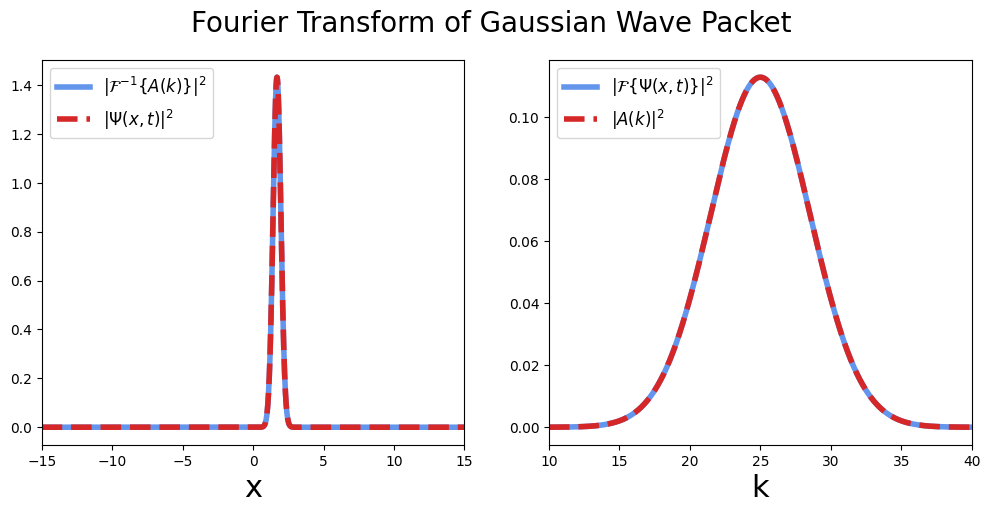

In [54]:
k0 = 25       
sigma = .2
t = 200
plot_fourier_Gaussian(k0=k0, sigma=sigma, m=m_el, t=t)